# Final Notebook - Group 6

## Introduction

This project will focus on finding the best neighborhood to live in for another pandemic from Allegheny County COVID-19 cases, Public WiFi Locations by Allegheny County and 30-Day Police Blotter.


## Metric #1: Police Blotter - Maya

### Introduction

The 30-Day Police Blotter contains the most recent initial crime incident data, updated on a nightly basis. All data is reported at the block/intersection level, with the exception of sex crimes, which are reported at the police zone level. 
This dataset only contains information reported by City of Pittsburgh Police, and does not contain incidents that solely involve other police departments operating within the city (campus police, Port Authority, etc.)

The data set is Public WiFi Locations https://data.wprdc.org/dataset/police-incident-blotter


#### Examine Data from 30-day Police Report 

In [1]:
import matplotlib.pyplot as plt
import geopandas
import pandas as pd
%matplotlib inline

#Open Police Blotter data 
police_blotter = pd.read_csv("datasets/police_data.csv", sep=",") 
police_blotter

<ipython-input-1-1ca8b0173f8e>:7: DtypeWarning: Columns (3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  police_blotter = pd.read_csv("datasets/police_data.csv", sep=",")


,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y,Num
0,2.768477e+08,22047618.0,6.0,2022-03-31T08:42:00,"1900 Block Murray Ave Pittsburgh, PA 15217",N,Squirrel Hill South,4,THEFT,3921(a) Theft by Unlawful Taking or Dispositio...,1408.0,5.0,3.0,-79.923068,40.435880,1
1,2.768571e+08,22047668.0,0.0,2022-03-30T09:45:00,"2200 Block Shady Ave Pittsburgh, PA 15217",N,Squirrel Hill South,4,99,2709.1 Stalking Conduct or Repeatedly Acts Inc...,1408.0,5.0,3.0,-79.918778,40.433377,1
2,2.773046e+08,22050629.0,6.0,2022-04-05T10:10:00,"1100 Block Round Top St Pittsburgh, PA 15205",N,Crafton Heights,6,THEFT FROM AUTO,3934 Theft from Vehicle / 3304(a)(5) CRIMINAL ...,2815.0,NaN,NaN,NaN,NaN,1
3,-3.413184e+09,22043806.0,27.0,2022-03-24T14:51:00,"S 23rd St & Sidney St Pittsburgh, PA 15203",Y,South Side Flats,3,HIT AND RUN,3743 Accidents Involving Damage to Attended Ve...,1609.0,3.0,3.0,-79.972945,40.429246,1
4,2.762184e+08,22043851.0,18.0,2022-03-24T15:17:00,"Bingham St & S 6th St Pittsburgh, PA 15203",Y,South Side Flats,3,STOLEN PROPERTY,13(a)(32) Paraphernalia - Use or Possession,1702.0,3.0,3.0,-79.993635,40.429359,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


Upon further inspection it was clear that some of the data was taken from outside cities as well. This data was removed to focus on the Pittsburgh metro-area. 

In [2]:
#Filter out non-pittsburgh related incidents 
police_blotter = police_blotter[police_blotter["INCIDENTNEIGHBORHOOD"].str.contains("Outside County") == False]
police_blotter

,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y,Num
0,2.768477e+08,22047618.0,6.0,2022-03-31T08:42:00,"1900 Block Murray Ave Pittsburgh, PA 15217",N,Squirrel Hill South,4,THEFT,3921(a) Theft by Unlawful Taking or Dispositio...,1408.0,5.0,3.0,-79.923068,40.435880,1
1,2.768571e+08,22047668.0,0.0,2022-03-30T09:45:00,"2200 Block Shady Ave Pittsburgh, PA 15217",N,Squirrel Hill South,4,99,2709.1 Stalking Conduct or Repeatedly Acts Inc...,1408.0,5.0,3.0,-79.918778,40.433377,1
2,2.773046e+08,22050629.0,6.0,2022-04-05T10:10:00,"1100 Block Round Top St Pittsburgh, PA 15205",N,Crafton Heights,6,THEFT FROM AUTO,3934 Theft from Vehicle / 3304(a)(5) CRIMINAL ...,2815.0,NaN,NaN,NaN,NaN,1
3,-3.413184e+09,22043806.0,27.0,2022-03-24T14:51:00,"S 23rd St & Sidney St Pittsburgh, PA 15203",Y,South Side Flats,3,HIT AND RUN,3743 Accidents Involving Damage to Attended Ve...,1609.0,3.0,3.0,-79.972945,40.429246,1
4,2.762184e+08,22043851.0,18.0,2022-03-24T15:17:00,"Bingham St & S 6th St Pittsburgh, PA 15203",Y,South Side Flats,3,STOLEN PROPERTY,13(a)(32) Paraphernalia - Use or Possession,1702.0,3.0,3.0,-79.993635,40.429359,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2948,2.776706e+08,22052867.0,0.0,2022-04-09T02:00:00,"3100 Block Brereton St Pittsburgh, PA 15219",N,Polish Hill,2,99,9999 9999 - (Misc. Incident):,605.0,7.0,6.0,-79.967156,40.456540,1
2949,2.776727e+08,22050126.0,0.0,2022-04-04T12:19:00,"5th Ave & Craft Ave Pittsburgh, PA 15213",N,West Oakland,4,99,9999 9999 - (Misc. Incident): Crash,402.0,6.0,3.0,-79.963936,40.437850,1
2950,2.776843e+08,22052964.0,27.0,2022-04-09T09:56:00,"200 Block Federal St S Pittsburgh, PA 15212",N,Allegheny Center,1,HIT AND RUN,3745 Accidents Involving Damage to Unattended ...,2204.0,1.0,6.0,-80.003964,40.448421,1
2951,2.776887e+08,22045432.0,4.0,2022-03-27T09:30:00,"Wenzell Pl & Wenzell Ave Pittsburgh, PA 15216",Y,Beechview,6,AGG-ASSAULT,2702 Aggravated Assault. / 2701 Simple Assault.,1920.0,4.0,5.0,-80.030439,40.399855,1


#### Determine Key Statistics 

In [3]:
import pandas as pd
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
poldata = police_blotter
num_of_crimes = poldata.groupby("INCIDENTNEIGHBORHOOD").sum()['Num']
num_of_crimes.sort_values(ascending=False)

INCIDENTNEIGHBORHOOD
Central Business District    195
Carrick                      122
South Side Flats             117
East Liberty                  98
Brookline                     88
                            ... 
Mt. Oliver Boro                3
Summer Hill                    2
Ridgemont                      2
St. Clair                      1
East Carnegie                  1
Name: Num, Length: 92, dtype: int64

In [5]:
#filter out important info 
poldata = police_blotter
num_of_crimes = poldata.groupby("INCIDENTNEIGHBORHOOD").sum()['Num']
num_of_crimes.sort_values(ascending=True)

INCIDENTNEIGHBORHOOD
St. Clair                      1
East Carnegie                  1
Ridgemont                      2
Summer Hill                    2
Regent Square                  3
                            ... 
Brookline                     88
East Liberty                  98
South Side Flats             117
Carrick                      122
Central Business District    195
Name: Num, Length: 92, dtype: int64

#### Interpretation 
Some of these neighborhoods are generalized to large areas- for example, the central business district also intersects some of the smaller neighborhoods like the Bluff, downtown strip area, and parts of south shore. In order to gain accurate insight into Pittsburgh metro-neighborhoods, data had to be merged with the neighborhoods shapefile to map the crime rate accurately. 

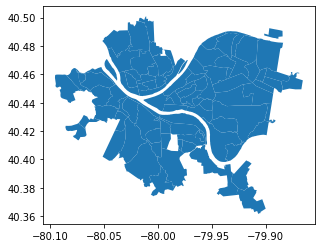

In [6]:
neighborhoods = geopandas.read_file("datasets/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe

In [7]:
# do the merge
crime_map = neighborhoods.merge(num_of_crimes, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')
# look at the head to confirm it merged correctly
crime_map[['hood','Num','geometry']].head()

,hood,Num,geometry
0,Chateau,28.0,"POLYGON ((-80.02999 40.45909, -80.02989 40.458..."
1,Summer Hill,2.0,"POLYGON ((-80.01078 40.49975, -80.01073 40.499..."
2,Northview Heights,23.0,"POLYGON ((-80.00327 40.48271, -80.00325 40.482..."
3,Spring Hill-City View,16.0,"POLYGON ((-79.99761 40.47460, -79.99761 40.474..."
4,Perry South,44.0,"POLYGON ((-80.01422 40.47745, -80.01435 40.477..."


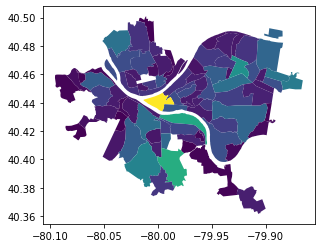

In [8]:
# draw a choropleth map using data from the column named "number_of_steps"
crime_map.plot(column='Num')

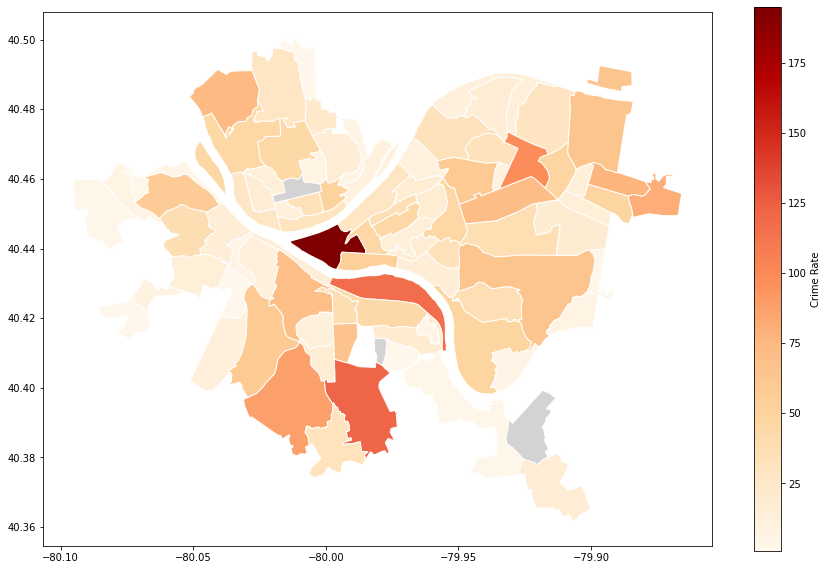

In [9]:
crime_map.plot(column='Num', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Crime Rate"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

#### Incident Crime: highest rate in the business district
It was found that the central business district (which includes central oakland), has the highest rate of crime, followed by Carrick, Southside Flats, and East Liberty. Although the labeling of the neighborhoods has slight discrepancy between the shape file I used and the Neighborhood data from the police report, the findings on the shapefile match that of the geographic map using the policeblotter data neighborhood monikers. 
The safest neighborhood is tied between that of East Carnegie and St. Clair. 

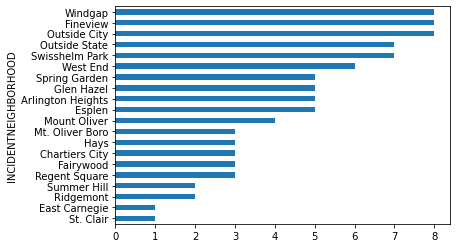

In [10]:
num_of_crimes = num_of_crimes.sort_values(ascending=True)
num_of_crimes.head(20).plot.barh(x='hood')


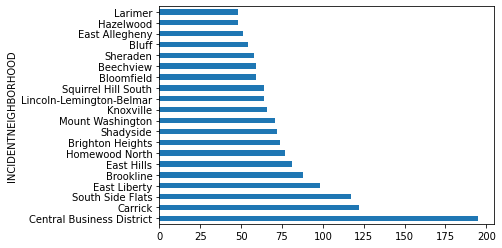

In [11]:
num_of_crimes = num_of_crimes.sort_values(ascending=False)
num_of_crimes.head(20).plot.barh(x='hood')

## Metric #2: COVID-19 cases - Justin

#### Introduction:

This notebook will explore the different neighborhoods of Pittsburgh and see the COVID cases (such as infections, reinfections, deaths, and hospitalization) that are associated with each neighborhood.

##### The Metric:
The goal of this notebook as stated above, is to find the neighborhood with the least amount of COVID stats. 
<br>
<br>
To accomplish this goal, we will explore the infections and reinfection statistics and add that to a total score for each neighborhood, as infections and reinfection statistic means that the person has had COVID, which means that you might get COVID from them. Additionally, reinfections also mean that the person got COVID a second time, meaning that they didn't learn from prior experience and will most likely be roaming around the neighborhood while infected with COVID.
<br>
<br>
Once we get add up the infections, we will subtract the deaths and hospitalizations statistics from the total, as those people will not be able to interact with you, since they are well, dead or in the hospital, which you should not be going into during a pandemic unless there is a medical emergency.
<br>
<br>
When we finally get all those statistics added up, the one with the smallest number will be the best neighborhood to be in, as they have the least amount of infections while having the most amount of dead/hospitalized people. Which means that the chance of interacting with someone with COVID will be the lowest.

In [12]:
# Importing some very useful stuff
import csv
import pandas as pd
import numpy as np
import geopandas as gp
%matplotlib inline
import matplotlib.pyplot as plt

covid = pd.read_csv("datasets/covid.csv") # Getting some data about COVID

Now that we have imported and gotten the dataset, we need to delete some columns that we won't be using, such as the antigen tests and polymerase chain reaction tests.

In [13]:
# delete the useless columns that we don't need to use
del covid['ag_tests'] 
del covid['positive_ag_tests']
del covid['pcr_tests']
del covid['positive_pcr_tests']
del covid['update_date']
del covid['postives']
del covid['tests']

Since the dataset takes into account all of Allegeny County, we need to get the Pittsburgh neighborhoods.
<br>
The dataset makes this easy, as the neighborhood column specifies whether or not they are in Pittsburgh, so we fliter out the ones that don't include Pittsburgh.

In [14]:
query_mask = covid.loc[:, 'neighborhood_municipality'].str.contains('Pittsburgh') # getting the ones that include Pittsburgh
covid_pitt_neighborhoods_only = covid[query_mask]
covid_pitt_neighborhoods_only.head()

,neighborhood_municipality,individuals_tested,infections,reinfections,deaths,hospitalizations
1,Allegheny Center (Pittsburgh),1011,1181,80,5,14
2,Allegheny West (Pittsburgh),349,392,61,0,5
3,Allentown (Pittsburgh),1489,2294,176,2,33
4,Arlington (Pittsburgh),1075,1736,216,9,29
5,Arlington Heights (Pittsburgh),148,149,11,3,3


Now we sort through the dataset and get all the neighborhood information. such as the infection, reinfections, deaths and hospitalizations. We are going to add up/subtract each statistic into their respective neighborhood, so we are going to end up with one massive number that includes the infection, reinfection, deaths and hospitalizations.

In [15]:
neighborhood_score = dict()
count = 0

# we put the number of infections into a dictionary for each neighborhood
for index, row in covid_pitt_neighborhoods_only.iterrows():
    
    neighborhood = covid_pitt_neighborhoods_only.iloc[count]['neighborhood_municipality'] # we count it by the count instaed of index as index gives us the location in the covid
                                                                                          # dataset and not the covid_pitt)neighborhoods_only dataset.
    infected = covid_pitt_neighborhoods_only.iloc[count]['infections'] 
    reinfected = covid_pitt_neighborhoods_only.iloc[count]['reinfections'] 
    deaths = covid_pitt_neighborhoods_only.iloc[count]['deaths'] 
    hospitalization = covid_pitt_neighborhoods_only.iloc[count]['hospitalizations']
    
    total = (infected) + (reinfected) - deaths - hospitalization # adds/subtract the stats into a neighborhood total

    neighborhood_score[neighborhood] = total # we don't need to see if the neighborhood is already in the dictionary
                                             # since we never loop through the list of neighborhoods more than once
    count += 1

After we finish creating the massive dictionary of neighborhoods, we want to sort the neighborhood by score going by ascending order, modify some of the names, and remove some neighborhoods that aren't actually neighborhoods, such as undefined.

In [16]:
# puts the dictionary we made of the covid infection cases into ascending order
covid_in_ascending_order = dict(sorted(neighborhood_score.items(), key = lambda item: item[1], reverse=False))


# remove the word (Pittsburgh) from the neighborhoods
doItHere = []
for neighborhood in covid_in_ascending_order:
    doItHere += [neighborhood]
    
for neighborhood in doItHere:
    new_name = neighborhood.replace("Pittsburgh",'').replace("(","").replace(")","").strip()
    covid_in_ascending_order[new_name] = covid_in_ascending_order.pop(neighborhood)

# we need it to say South Side Flats, not Southside Flats
covid_in_ascending_order["South Side Flats"] = covid_in_ascending_order.pop("Southside Flats")

# removing some neighborhoods that aren't in Pittsburgh
covid_in_ascending_order.pop("East")    
covid_in_ascending_order.pop("Undefined")

# prints out the dictionary of neighborhoods and their resepective scores
for neighborhood in covid_in_ascending_order:
    score = covid_in_ascending_order[neighborhood]
    print(f"{neighborhood} has a score of {score}.")

Chateau has a score of 85.
St. Clair has a score of 134.
Arlington Heights has a score of 154.
West End has a score of 219.
Hays has a score of 239.
South Shore has a score of 256.
Mt. Oliver has a score of 279.
Esplen has a score of 285.
Chartiers City has a score of 414.
Allegheny West has a score of 448.
Ridgemont has a score of 465.
North Shore has a score of 528.
Bon Air has a score of 560.
Homewood West has a score of 603.
Regent Square has a score of 623.
East Carnegie has a score of 643.
Spring Garden has a score of 661.
Oakwood has a score of 670.
California-Kirkbride has a score of 771.
New Homestead has a score of 811.
Fineview has a score of 869.
Polish Hill has a score of 914.
Swisshelm Park has a score of 924.
Summer Hill has a score of 970.
Windgap has a score of 1115.
Bedford Dwellings has a score of 1149.
Middle Hill has a score of 1170.
Allegheny Center has a score of 1242.
Northview Heights has a score of 1288.
Point Breeze North has a score of 1438.
Beltzhoover has 

Now that the dictionary is in sorted order, we are going to make a graph and eventually a heat map of the data.
<br>
Before we do that, we need to turn it into something that can print a graph and map, so the dictionary is going to be turned into a dataset.

In [17]:
# converting the dictionary into something we can make a graph from.
neighborhoodDf = pd.DataFrame(list(covid_in_ascending_order.items()),columns = ['neighborhood_municipality','Score'])

Let's see some of the worst scoring neighborhoods in Pittsburgh.

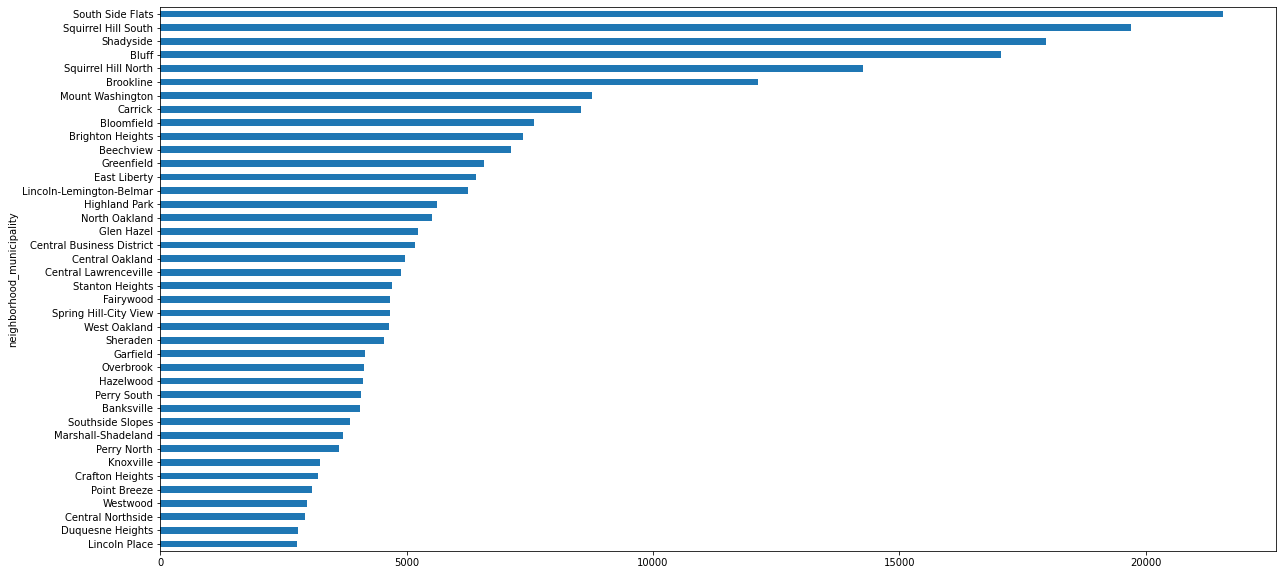

In [18]:
neighborhoodDf.iloc[50:92].plot(x = 'neighborhood_municipality',y = 'Score', kind = "barh", figsize = (20,10), stacked = True, legend = False)

Alrighty, now let's see the top 10 lowest scoring neighborhoods in Pittsburgh.

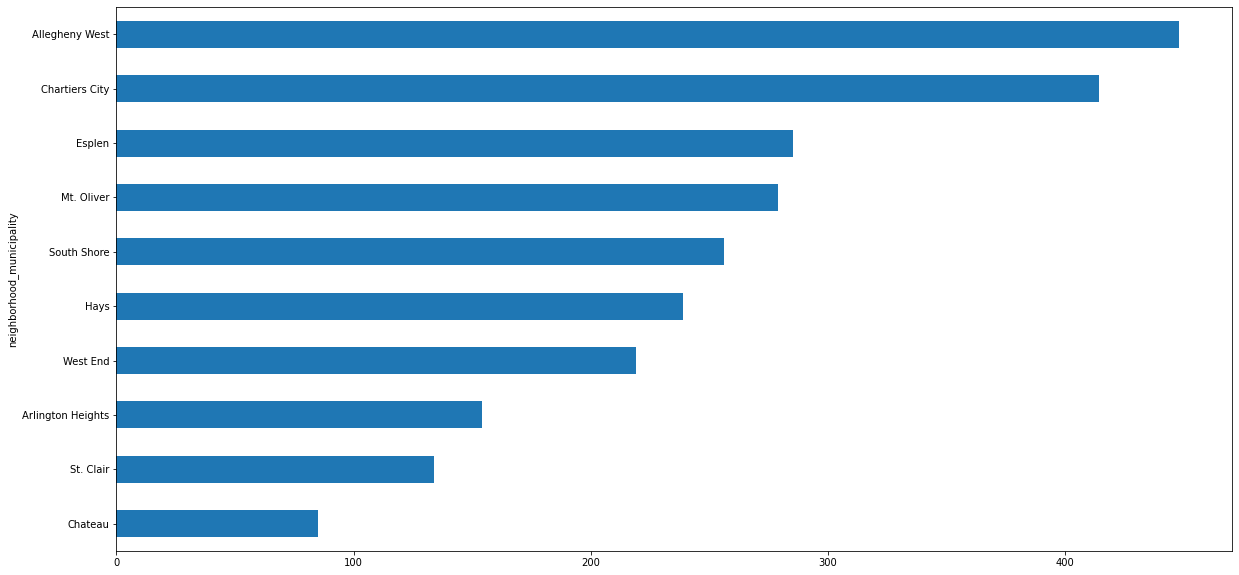

In [19]:
neighborhoodDf.iloc[0:10].plot(x ='neighborhood_municipality',y = 'Score', kind = "barh", figsize = (20,10), stacked = True, legend = False)

Now that we have the bar graph of the neighborhoods. We should put it into a map and see how the data looks.
<br>
To accomplish this, firstly we have to get a shapefile that contains the nieghborhoods. Then we combine our neighborhood dataset with that shapefile, which will give us a map that contains all the COVID scores, allowing an easier way to see the data visually.

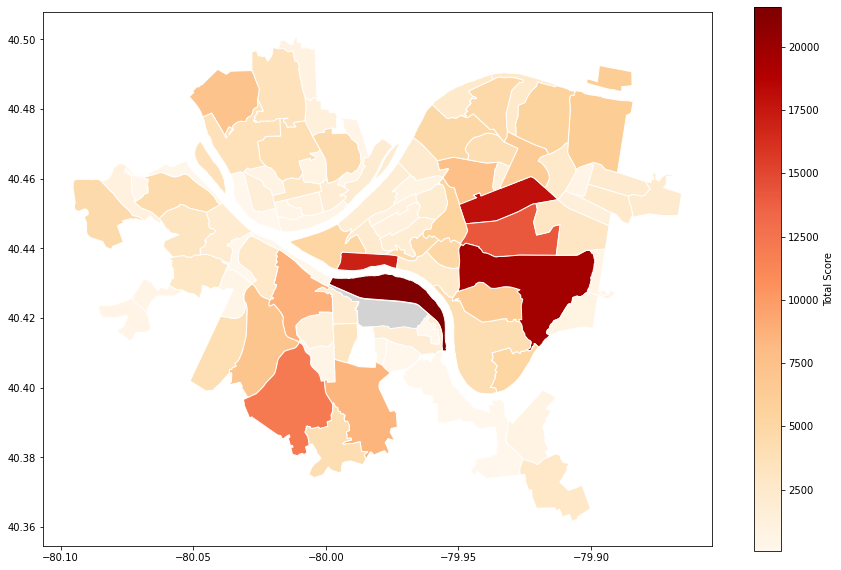

In [20]:
neighborhoods = gp.read_file("datasets/Neighborhoods_.shp") # reads the neighborhood shape file.

# merging the neighborhood score data with the neighborhoods of Pittsburgh
covid_map = neighborhoods.merge(neighborhoodDf,how ='left', left_on ='hood', right_on = "neighborhood_municipality")
# Printing out a heat map of the neighborhoods and their scores.
covid_map.plot(column='Score', cmap='OrRd', edgecolor="white", legend=True, legend_kwds={'label': "Total Score"},
              figsize=(15, 10),missing_kwds={"color": "lightgrey"})

So, the darker areas of the map are the neighborhoods with the higher scores, while the lighter regions are the locations with the loweer scores. Additionally, the darker areas tend to be in the center of Pittsburgh, while the lighter areas tend to be near the edges of the city.

### CONCLUSION:
As we saw during the bar graph and the list of scores and in the heat map (if you know where Chateau is), Chateu comes out as the best neighborhood to not get COVID in, as it had a score of 85, meaning that barely anyone got COVID, or a lot of people died/are hospitalized. While the worst neighborhood in Pittsburgh when it comes to getting COVID, is South Side Flats with a score of 21,571.

## Metric #3: Public WiFi - Haotian

### Introduction

This notebook shows the numbers of institutional and crowdsourced WiFi locations in Western Pennsylvania. This is an indicate to show how easily people can get free access to the Internet if we have to go through another pandemic life.

The data set is Public WiFi Locations  https://data.wprdc.org/dataset/public-wifi-locations


In [21]:
import matplotlib.pyplot as plt
import geopandas
import pandas as pd
%matplotlib inline

### Process data

#### 1. wifi locations csv

In [22]:
# Have a look on public wifi csv
wifi = pd.read_csv("datasets/Public_WiFi_Locations.csv", sep=",") 
wifi

,X,Y,objectid,globalid,LocationName,LocationDetails,LocationHours,SSID,PasswordRequired,PasswordDetails,...,LocationState,LocationZip,LocationWebsite,AmenitiesRestroom,AmenitiesSeating,AmenitiesVending,AmenitiesDetails,PublicNotes,LocationType,ID
0,-80.006667,40.456544,22,6adecc06-b03e-4d52-ae47-4557b39331de,Carnegie Library of Pittsburgh - Allegheny,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-Allegheny,No,NaN,...,PA,15212.0,https://www.carnegielibrary.org/clp_location/a...,yes,yes,no,Adjacent to Federal street restuarants and All...,NaN,Institutional,CLP_Allegheny
1,-80.027710,40.407046,23,28feaf52-49f3-4c12-aaed-c42fc1f1cfc3,Carnegie Library of Pittsburgh - Beechview,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-Beechview,No,NaN,...,PA,15216.0,https://www.carnegielibrary.org/clp_location/b...,yes,yes,no,adjacent to Belasco T stop,NaN,Institutional,CLP_Beechview
2,-80.021397,40.394401,24,5e382f99-c41b-4837-aaad-b79cd4340a2b,Carnegie Library of Pittsburgh - Brookline,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-Brookline,No,NaN,...,PA,15226.0,https://www.carnegielibrary.org/clp_location/b...,yes,yes,no,located in Brookline business district,NaN,Institutional,CLP_Brookline
3,-79.987547,40.397006,25,665e443b-3348-4d93-8a42-0bf860ee61f0,Carnegie Library of Pittsburgh - Carrick,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-Carrick,No,NaN,...,PA,15210.0,https://www.carnegielibrary.org/clp_location/c...,yes,yes,no,street parking available,NaN,Institutional,CLP_Carrick
4,-79.926537,40.460938,27,f01d16aa-3717-4f3c-bf6a-81b507c167e6,Carnegie Library of Pittsburgh - East Liberty,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-East Liberty,No,NaN,...,PA,15206.0,https://www.carnegielibrary.org/clp_location/e...,yes,yes,no,Parking lot behind library on Beatty Street,NaN,Institutional,CLP_East_Liberty
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,-79.843893,40.371366,170,27c064a6-e9c4-4666-8497-273570d9ef9b,Duquesne Family Center,Parking Lot,"24 hours/day, 7 days/week",AC_Public,no,NaN,...,PA,15110.0,NaN,no,no,no,NaN,NaN,Institutional,NaN
135,-79.974108,40.393625,171,e03eac15-f5d6-4000-83b4-5aecad4e2876,Donnelly Boland Main Office,Parking lot,"24 hours/day, 7 days/week",AC_Public,no,NaN,...,Pennsylvania,15227.0,NaN,no,no,no,NaN,NaN,Institutional,NaN
136,-79.991031,40.391500,173,d3b7eaad-9635-4d82-871e-ddf9e33192e4,NaN,NaN,Building closes at 7 PM,NaN,NaN,NaN,...,NaN,NaN,NaN,yes,NaN,NaN,NaN,Within Phillips Park,Institutional,NaN
137,-80.004189,40.413715,174,7b0c7823-c4ac-4e9e-ac80-851be7999ada,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,Institutional,NaN


In [23]:
# Since we focus on Pittsburgh Neighborhood, we just keep the location in Pittsburgh
wifi = wifi[wifi["LocationCity"].str.contains("Pittsburgh") == True]
wifi

,X,Y,objectid,globalid,LocationName,LocationDetails,LocationHours,SSID,PasswordRequired,PasswordDetails,...,LocationState,LocationZip,LocationWebsite,AmenitiesRestroom,AmenitiesSeating,AmenitiesVending,AmenitiesDetails,PublicNotes,LocationType,ID
0,-80.006667,40.456544,22,6adecc06-b03e-4d52-ae47-4557b39331de,Carnegie Library of Pittsburgh - Allegheny,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-Allegheny,No,NaN,...,PA,15212.0,https://www.carnegielibrary.org/clp_location/a...,yes,yes,no,Adjacent to Federal street restuarants and All...,NaN,Institutional,CLP_Allegheny
1,-80.027710,40.407046,23,28feaf52-49f3-4c12-aaed-c42fc1f1cfc3,Carnegie Library of Pittsburgh - Beechview,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-Beechview,No,NaN,...,PA,15216.0,https://www.carnegielibrary.org/clp_location/b...,yes,yes,no,adjacent to Belasco T stop,NaN,Institutional,CLP_Beechview
2,-80.021397,40.394401,24,5e382f99-c41b-4837-aaad-b79cd4340a2b,Carnegie Library of Pittsburgh - Brookline,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-Brookline,No,NaN,...,PA,15226.0,https://www.carnegielibrary.org/clp_location/b...,yes,yes,no,located in Brookline business district,NaN,Institutional,CLP_Brookline
3,-79.987547,40.397006,25,665e443b-3348-4d93-8a42-0bf860ee61f0,Carnegie Library of Pittsburgh - Carrick,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-Carrick,No,NaN,...,PA,15210.0,https://www.carnegielibrary.org/clp_location/c...,yes,yes,no,street parking available,NaN,Institutional,CLP_Carrick
4,-79.926537,40.460938,27,f01d16aa-3717-4f3c-bf6a-81b507c167e6,Carnegie Library of Pittsburgh - East Liberty,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-East Liberty,No,NaN,...,PA,15206.0,https://www.carnegielibrary.org/clp_location/e...,yes,yes,no,Parking lot behind library on Beatty Street,NaN,Institutional,CLP_East_Liberty
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,-79.912154,40.447013,141,a8f3150b-faa8-48a2-88d8-740e91aa55d3,Wilkins 2401,Within 100 ft,"24 hours/day, 7 days/week",Meta Mesh,No,NaN,...,PA,15217.0,NaN,NaN,NaN,NaN,Nearby Homewood Cemetery and Point Brugge Cafe,Residential / Community-Based,Institutional,Wilkins 2401
109,-79.994120,40.421656,142,350d8a4e-36f6-4651-b995-0d840faf011d,Work Hard PGH,Within 100 ft,"24 hours/day, 7 days/week",Meta Mesh Public WiFi,No,NaN,...,PA,15210.0,https://www.metamesh.org/#!contact-meta-mesh/c...,Yes,NaN,NaN,"Nearby East Warrington Ave shops, pharmacy",Cooperative / Community,Institutional,Work Hard PGH
110,-79.994049,40.421392,143,218cecd0-a9c6-4fce-9b42-dd04052a8145,Work Hard PGH (Rear),Within 100 ft,"24 hours/day, 7 days/week",Meta Mesh Public WiFi,No,NaN,...,PA,15210.0,https://www.metamesh.org/#!contact-meta-mesh/c...,Yes,NaN,NaN,"Nearby East Warrington Ave shops, pharmacy",Cooperative / Community,Institutional,Work Hard PGH (Rear)
111,-79.979066,40.423803,144,e38faa85-9b16-48eb-9a84-459d9e955813,Oporto and Gregory Street,Within 100 ft,"24 hours/day, 7 days/week",Meta Mesh,No,NaN,...,PA,15213.0,NaN,NaN,NaN,NaN,Nearby South Side Park and walkable to South S...,Residential / Community-Based,Institutional,Oporto and Gregory Street


In [24]:
# Since there are no useful data to indicate where it actually is, I used zipcode to indentify
wifi = wifi.iloc[:, [16]]
wifi

,LocationZip
0,15212.0
1,15216.0
2,15226.0
3,15210.0
4,15206.0
...,...
108,15217.0
109,15210.0
110,15210.0
111,15213.0


In [25]:
# remove all the noun data
wifi.dropna()
wifi

,LocationZip
0,15212.0
1,15216.0
2,15226.0
3,15210.0
4,15206.0
...,...
108,15217.0
109,15210.0
110,15210.0
111,15213.0


#### zipcode

In [26]:
# Since there is no zipcode information in Neighborhood file, I tried to find another csv from police station
zipcode = pd.read_csv("datasets/zip.csv", sep=",")
zipcode

,id,parcel_id,inactive,name,rentable,type,primary_user,address_number,street,zip,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,650726265,120-J-300,f,57th Street Park Building,f,Storage,Department of Public Works,NaN,57TH ST,NaN,...,Upper Lawrenceville,7,10.0,42003101100,2.0,10.0,2.0,3-5,40.485666,-79.946450
1,783044037,2-H-284,f,Albert Turk Graham Park Shelter,f,Shelter,Department of Public Works,39.0,VINE ST,NaN,...,Crawford-Roberts,6,3.0,42003030500,3.0,3.0,2.0,2-1,40.440472,-79.984106
2,1997158435,23-R-157,f,Allegheny Northside Senior Center and Hazlett ...,t,Senior,CitiParks,5.0,ALLEGHENY SQ E,15212.0,...,Allegheny Center,1,22.0,42003562700,1.0,22.0,1.0,1-6,40.453099,-80.005343
3,204824684,10-F-198,f,Ammon Recreation Center,f,Pool,CitiParks,2217.0,BEDFORD AVE,15219.0,...,Bedford Dwellings,6,5.0,42003050900,3.0,5.0,2.0,2-5,40.448735,-79.977856
4,472140955,013-K-314,f,Arlington Field Lights Building,f,Utility,CitiParks,0.0,STERLING ST,15210.0,...,South Side Slopes,3,16.0,42003160800,3.0,16.0,3.0,4-22,40.418152,-79.974471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,1111447104,231-S-600,NaN,East Hills Park Shelter,f,Shelter,Department of Public Works,NaN,WILNER DR,15221.0,...,East Hills,9,13.0,42003130600,2.0,13.0,5.0,3-19,40.453983,-79.871411
407,1273938304,85-P-53,NaN,Wightman Park Restroom Building,f,Restrooms,CitiParks,5604.0,SOLWAY ST,15217.0,...,Squirrel Hill North,8,14.0,42003140300,3.0,14.0,4.0,2-18,40.443078,-79.927032
408,1980141313,85-P-53,NaN,Wightman Park Service Building,f,Service,CitiParks,5604.0,SOLWAY ST,15217.0,...,Squirrel Hill North,8,14.0,42003140300,3.0,14.0,4.0,2-8,40.443626,-79.927644
409,933318227,85-P-53,NaN,Wightman Park Shelter,t,Shelter,CitiParks,5604.0,SOLWAY ST,15217.0,...,Squirrel Hill North,8,14.0,42003140300,3.0,14.0,4.0,2-18,40.443357,-79.926830


In [27]:
# We only extract zip and neighborhood
zipcode = zipcode.iloc[:, [9,11]]
zipcode

,zip,neighborhood
0,NaN,Upper Lawrenceville
1,NaN,Crawford-Roberts
2,15212.0,Allegheny Center
3,15219.0,Bedford Dwellings
4,15210.0,South Side Slopes
...,...,...
406,15221.0,East Hills
407,15217.0,Squirrel Hill North
408,15217.0,Squirrel Hill North
409,15217.0,Squirrel Hill North


### Merge

The way we merge these three 

In [28]:
# Merge the locationZip with neighborhood 
wifiInCity = wifi.merge(zipcode, how='left', left_on='LocationZip', right_on='zip')
wifiInCity = wifiInCity[['LocationZip', 'neighborhood']]
wifiInCity

,LocationZip,neighborhood
0,15212.0,Allegheny Center
1,15212.0,Brighton Heights
2,15212.0,Brighton Heights
3,15212.0,Brighton Heights
4,15212.0,Brighton Heights
...,...,...
745,15213.0,Central Oakland
746,15213.0,South Oakland
747,15213.0,Bloomfield
748,15213.0,South Oakland


The issue here is some places share the same zip code, as you can see in the table above, which have both benefits and drawbacks: benefits are it includes how much effect it has, drawbacks are it will cause duplicate a lot.

In [29]:
# remove null value
wifiInCity = wifiInCity.dropna()
wifiInCity

,LocationZip,neighborhood
0,15212.0,Allegheny Center
1,15212.0,Brighton Heights
2,15212.0,Brighton Heights
3,15212.0,Brighton Heights
4,15212.0,Brighton Heights
...,...,...
744,15213.0,West Oakland
745,15213.0,Central Oakland
746,15213.0,South Oakland
747,15213.0,Bloomfield


In [30]:
# Collect their names
names = wifiInCity.neighborhood.unique()
names

array(['Allegheny Center', 'Brighton Heights', 'Troy Hill',
       'East Allegheny', 'Perry North', 'Marshall-Shadeland', 'Chateau',
       'California-Kirkbride', 'Spring Hill-City View', 'Allegheny West',
       'Banksville', 'Beechview', 'Brookline', 'South Side Slopes',
       'Carrick', 'Beltzhoover', 'Knoxville', 'Allentown',
       'Lincoln-Lemington-Belmar', 'East Liberty', 'Morningside',
       'Highland Park', 'Elliott', 'Hazelwood', 'Greenfield', 'Hays',
       'Lincoln Place', 'Bedford Dwellings', 'Central Business District',
       'Bluff', 'Terrace Village', 'Crawford-Roberts', 'Upper Hill',
       'Polish Hill', 'Middle Hill', 'Homewood South', 'Homewood North',
       'Homewood West', 'Point Breeze North', 'Lower Lawrenceville',
       'Stanton Heights', 'Central Lawrenceville', 'West Oakland',
       'Central Oakland', 'South Oakland', 'Bloomfield', 'Windgap',
       'Sheraden', 'South Side Flats', 'Point Breeze', 'Regent Square',
       'Squirrel Hill North', 'Squirre

In [31]:
# Create the table we finally use
Count = pd.DataFrame(wifiInCity['neighborhood'].value_counts())

Count = Count.reset_index(level=0)

#Count = Count.rename(columns = {'index':'hood'}, inplace = True)
Count.rename({"index": "hood", 
           "neighborhood": "number"}, 
          axis = "columns", inplace = True)
Count

,hood,number
0,South Side Slopes,104
1,Beltzhoover,78
2,Knoxville,52
3,Carrick,52
4,Squirrel Hill South,39
...,...,...
56,Overbrook,2
57,Central Lawrenceville,1
58,Stanton Heights,1
59,Point Breeze North,1


#### Neighborhood

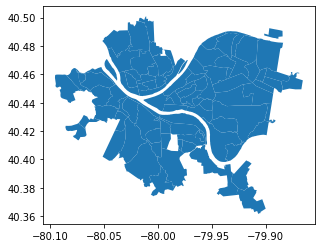

In [32]:
# Read the neighborhood for plotting
map = geopandas.read_file("datasets/Neighborhoods_.shp")
map.plot()

### Final show 

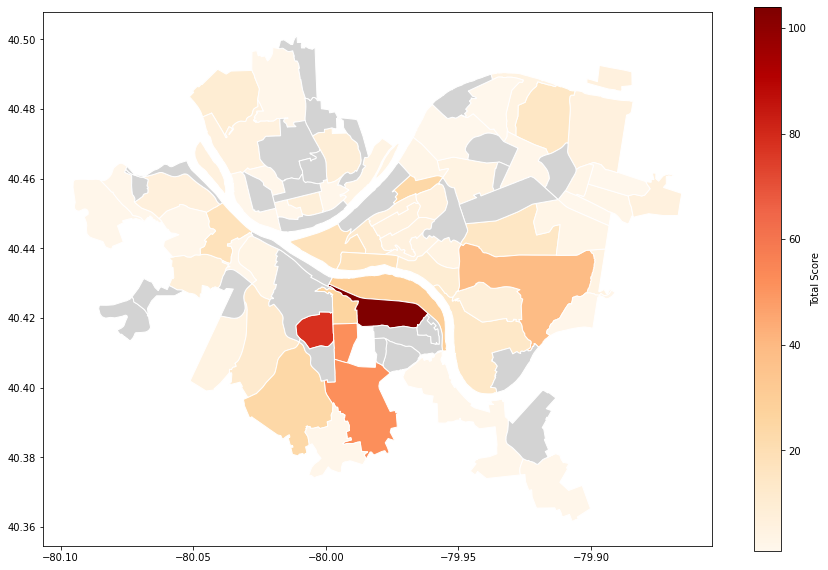

In [33]:
wifiMap = map.merge(Count, how = 'left', left_on = 'hood', right_on = 'hood')
wifiMap.plot(column='number', cmap='OrRd', edgecolor="white", legend=True, legend_kwds={'label': "Total Score"},
              figsize=(15, 10),missing_kwds={"color": "lightgrey"})

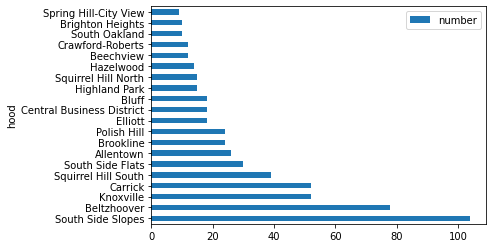

In [34]:
count = Count.sort_values('number', ascending=False)
count.head(20).plot.barh(x='hood')

1. South Side Slopes
2. Beltzhoover
3. Knoxville
4. Carrick
5. Squirrel Hill South
6. South Slide Flats
7. Allentown
8. Brookline
9. Polish Hill
10. Elliott

## Merge

The way we merge these three metrics is to assign different weights to them. We assign 0.4 to crimes, 0.4 to Covid, and 0.2 to wifi. (by significance for people to live in another pandemic life)

In [35]:
# Maya
crimes_rank = num_of_crimes.sort_values(ascending=True)
crimes_rank = crimes_rank.reset_index(level=0)

#Count = Count.rename(columns = {'index':'hood'}, inplace = True)
crimes_rank.rename({"INCIDENTNEIGHBORHOOD": "Neighborhood", 
           "Num": "numberOfCrime"}, 
          axis = "columns", inplace = True)


crimes_rank['Merge_Score_crimes'] = crimes_rank.index*0.4
del crimes_rank['numberOfCrime']
crimes_rank

,Neighborhood,Merge_Score_crimes
0,St. Clair,0.0
1,East Carnegie,0.4
2,Ridgemont,0.8
3,Summer Hill,1.2
4,Chartiers City,1.6
...,...,...
87,Brookline,34.8
88,East Liberty,35.2
89,South Side Flats,35.6
90,Carrick,36.0


In [36]:
# Justin
covid_rank = neighborhoodDf
covid_rank['Merge_Score_covid'] = covid_rank.index*0.4
del covid_rank['Score']
covid_rank

,neighborhood_municipality,Merge_Score_covid
0,Chateau,0.0
1,St. Clair,0.4
2,Arlington Heights,0.8
3,West End,1.2
4,Hays,1.6
...,...,...
85,Squirrel Hill North,34.0
86,Bluff,34.4
87,Shadyside,34.8
88,Squirrel Hill South,35.2


In [41]:
# Haotian
wifi_rank = count
wifi_rank['Merge_Score_wifi'] = wifi_rank.index*0.2
del wifi_rank['number']
wifi_rank

,hood,Merge_Score_wifi
0,South Side Slopes,0.0
1,Beltzhoover,0.2
2,Knoxville,0.4
3,Carrick,0.6
4,Squirrel Hill South,0.8
...,...,...
43,Fairywood,8.6
57,Central Lawrenceville,11.4
58,Stanton Heights,11.6
59,Point Breeze North,11.8


In [48]:
d1 = crimes_rank.merge(covid_rank, how='left', left_on = 'Neighborhood', right_on='neighborhood_municipality')
data = d1.merge(wifi_rank, how='left', left_on='neighborhood_municipality', right_on='hood')
data

,Neighborhood,Merge_Score_crimes,neighborhood_municipality,Merge_Score_covid,hood,Merge_Score_wifi
0,St. Clair,0.0,St. Clair,0.4,NaN,NaN
1,East Carnegie,0.4,East Carnegie,6.0,NaN,NaN
2,Ridgemont,0.8,Ridgemont,4.0,NaN,NaN
3,Summer Hill,1.2,Summer Hill,9.2,NaN,NaN
4,Chartiers City,1.6,Chartiers City,3.2,NaN,NaN
...,...,...,...,...,...,...
87,Brookline,34.8,Brookline,33.6,Brookline,1.4
88,East Liberty,35.2,East Liberty,30.8,East Liberty,10.8
89,South Side Flats,35.6,South Side Flats,35.6,South Side Flats,1.0
90,Carrick,36.0,Carrick,32.8,Carrick,0.6


In [49]:
data = data[['Neighborhood', 'Merge_Score_crimes', 'Merge_Score_covid', 'Merge_Score_wifi']]
data = data.dropna()
data

,Neighborhood,Merge_Score_crimes,Merge_Score_covid,Merge_Score_wifi
5,Hays,2.0,1.6,11.0
7,Regent Square,2.8,5.6,6.8
8,Fairywood,3.2,27.2,8.6
14,West End,5.6,1.2,9.0
15,Swisshelm Park,6.0,8.8,9.4
19,Windgap,7.6,9.6,10.4
22,Troy Hill,8.8,14.8,7.6
23,Lower Lawrenceville,9.2,16.8,8.4
24,Allegheny West,9.6,3.6,9.8
26,Beltzhoover,10.4,12.0,0.2


In [50]:
columns_list = ['Merge_Score_crimes', 'Merge_Score_covid', 'Merge_Score_wifi']
data['Final Score'] = data[columns_list].sum(axis=1)
data = data[['Neighborhood', 'Final Score']]
data

,Neighborhood,Final Score
5,Hays,14.6
7,Regent Square,15.2
8,Fairywood,39.0
14,West End,15.8
15,Swisshelm Park,24.2
19,Windgap,27.6
22,Troy Hill,31.2
23,Lower Lawrenceville,34.4
24,Allegheny West,23.0
26,Beltzhoover,22.6


In [53]:
data = data.sort_values(by = ["Final Score"], axis = 0, ascending = True)
data

,Neighborhood,Final Score
5,Hays,14.6
7,Regent Square,15.2
14,West End,15.8
26,Beltzhoover,22.6
24,Allegheny West,23.0
15,Swisshelm Park,24.2
33,Homewood West,26.4
19,Windgap,27.6
45,Polish Hill,28.0
31,California-Kirkbride,29.8


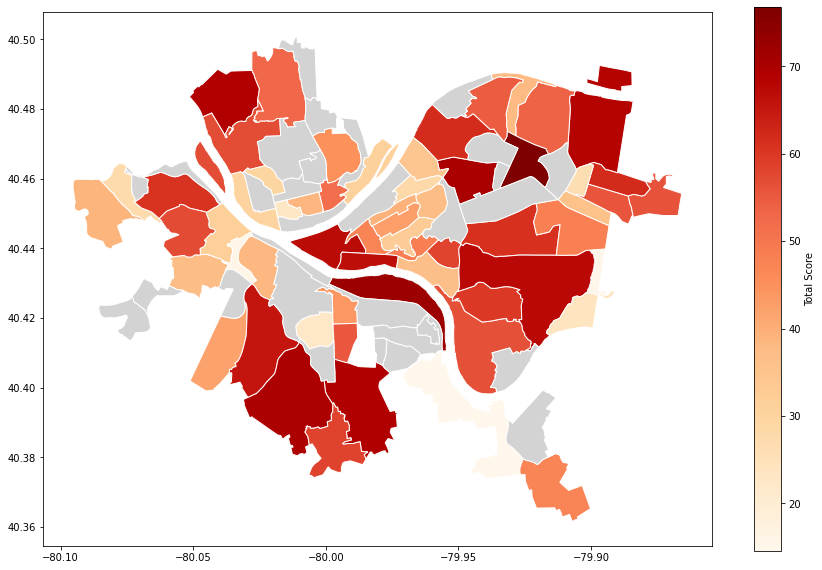

In [55]:
# Read the neighborhood for plotting
map = geopandas.read_file("datasets/Neighborhoods_.shp")
finalMap = map.merge(data, how = 'left', left_on = 'hood', right_on = 'Neighborhood')
finalMap.plot(column='Final Score', cmap='OrRd', edgecolor="white", legend=True, legend_kwds={'label': "Total Score"},
              figsize=(15, 10),missing_kwds={"color": "lightgrey"})

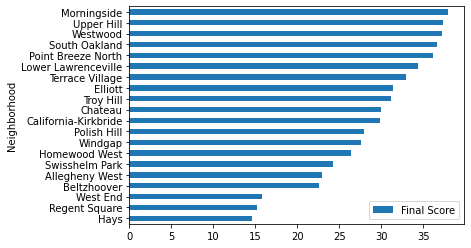

In [59]:
final = data.sort_values('Final Score', ascending=True)
final.head(20).plot.barh(x='Neighborhood')

## Conclusion

It turns out Hays is the best place for us to live in another pandemic. But it is highly biased due to the biased criterias.